In [169]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [170]:
def extract_metric(report_path, metric_name):
    with open(report_path, 'r') as file:
        content = file.read()
        match = re.search(rf'{re.escape(metric_name)}\s*\[?\%?\]?\s*([\d.]+)', content)
        if match:
            return float(match.group(1))
        else:
            return None

def collect_all_results(base_experiment_dir, metric_name):
    results = {}
    scenarios = []

    for scen in os.listdir(base_experiment_dir):
        scen_dir = os.path.join(base_experiment_dir, scen)
        if os.path.isdir(scen_dir):
            test_scenarios = os.path.join(scen_dir, 'results_gen')
            if os.path.exists(test_scenarios):
                scenarios.append(scen)
                for test_scen in os.listdir(test_scenarios):
                    test_scen_dir = os.path.join(test_scenarios, test_scen)
                    if os.path.isdir(test_scen_dir):
                        for agent_dir in os.listdir(test_scen_dir):
                            agent_dir_path = os.path.join(test_scen_dir, agent_dir)
                            report_path = os.path.join(agent_dir_path, 'report.txt')
                            if os.path.exists(report_path):
                                metric_value = extract_metric(report_path, metric_name)
                                if metric_value is not None:
                                    if 'last_model' in agent_dir:
                                        agent_name = 'last_model'
                                    else:
                                        agent_name = agent_dir.split('_model_')[1]
                                    if agent_name not in results:
                                        results[agent_name] = {}
                                    if scen not in results[agent_name]:
                                        results[agent_name][scen] = []
                                    results[agent_name][scen].append(metric_value)
    return results, scenarios

def calculate_average_metric(results):
    avg_results = {agent: {scen: sum(rates)/len(rates) for scen, rates in scen_results.items()} 
                   for agent, scen_results in results.items()}
    return avg_results

def visualize_combined_results(avg_results, scenarios, exp_id, metric_name):
    combined_results = {}
    for agent_name, scenario_results in avg_results.items():
        combined_results[agent_name] = []
        for scenario in scenarios:
            if scenario in scenario_results:
                combined_results[agent_name].append(scenario_results[scenario])
            else:
                combined_results[agent_name].append(0)

    def sort_key(agent_name):
        if agent_name == 'last_model':
            return (0,)
        try:
            return (1, int(agent_name))
        except ValueError:
            return (1, float('inf'))

    sorted_agents = sorted(combined_results.keys(), key=sort_key)
    sorted_results = {agent: combined_results[agent] for agent in sorted_agents}

    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(len(sorted_agents))
    width = 0.15  # Make the width of the bars narrower
    gap = 0.015  # Gap between groups of bars

    colors = plt.cm.tab20(np.linspace(0, 1, len(scenarios)))
    for i, scenario in enumerate(scenarios):
        scenario_metrics = [sorted_results[agent][i] for agent in sorted_agents]
        ax.bar(x + i * (width + gap), scenario_metrics, width, label=scenario, color=colors[i % len(colors)])

    ax.set_xlabel(f'Agents from experiment {exp_id}')
    ax.set_ylabel(f'Average {metric_name} [%]')
    ax.set_title(f'Average {metric_name} Across All Test Scenarios')
    ax.set_xticks(x + (width + gap) * (len(scenarios) - 1) / 2)
    ax.set_xticklabels(sorted_agents, rotation=90)
    ax.legend()
    plt.tight_layout()
    plt.show()


# Old Drone and rew fcn

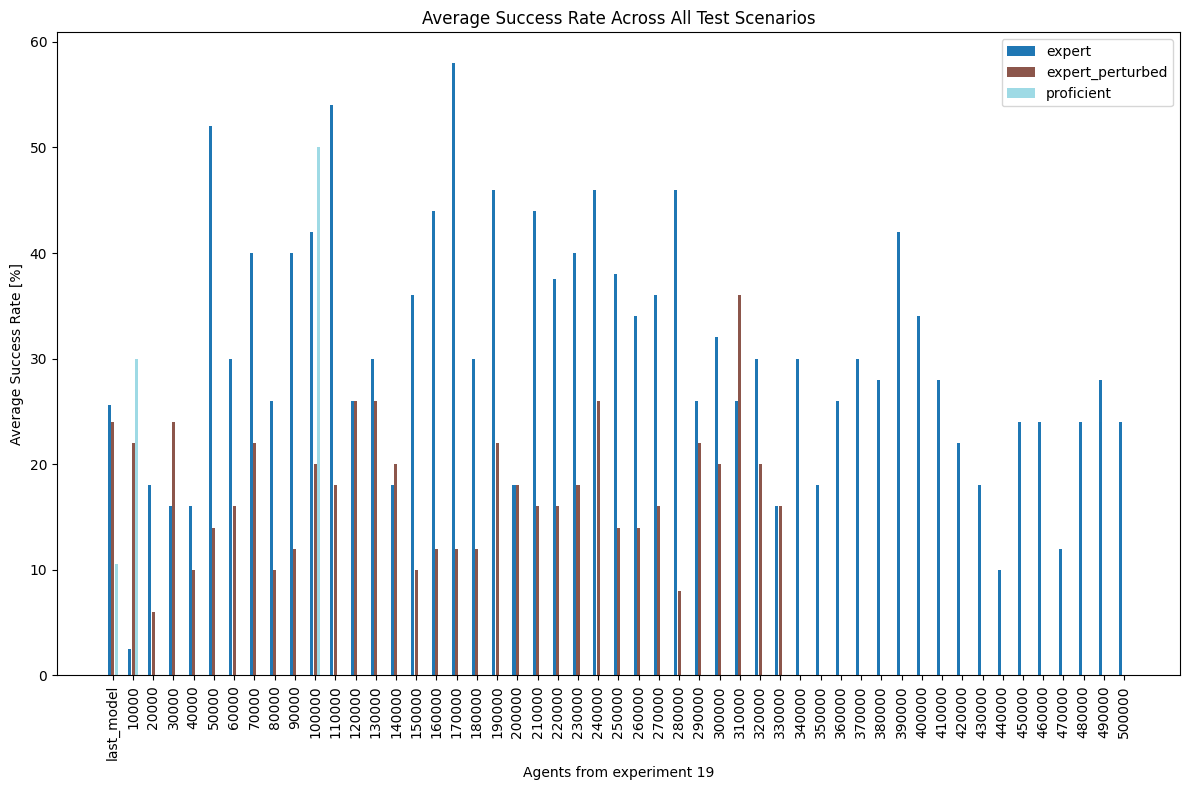

In [171]:
exp_id = 19
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  
'''Available metrics are: 
'Success Rate' 
'Collision Rate'
'Progression'
'Avg. Absolute Path Error [m]'
'Avg. Number of Timesteps'
'''

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)


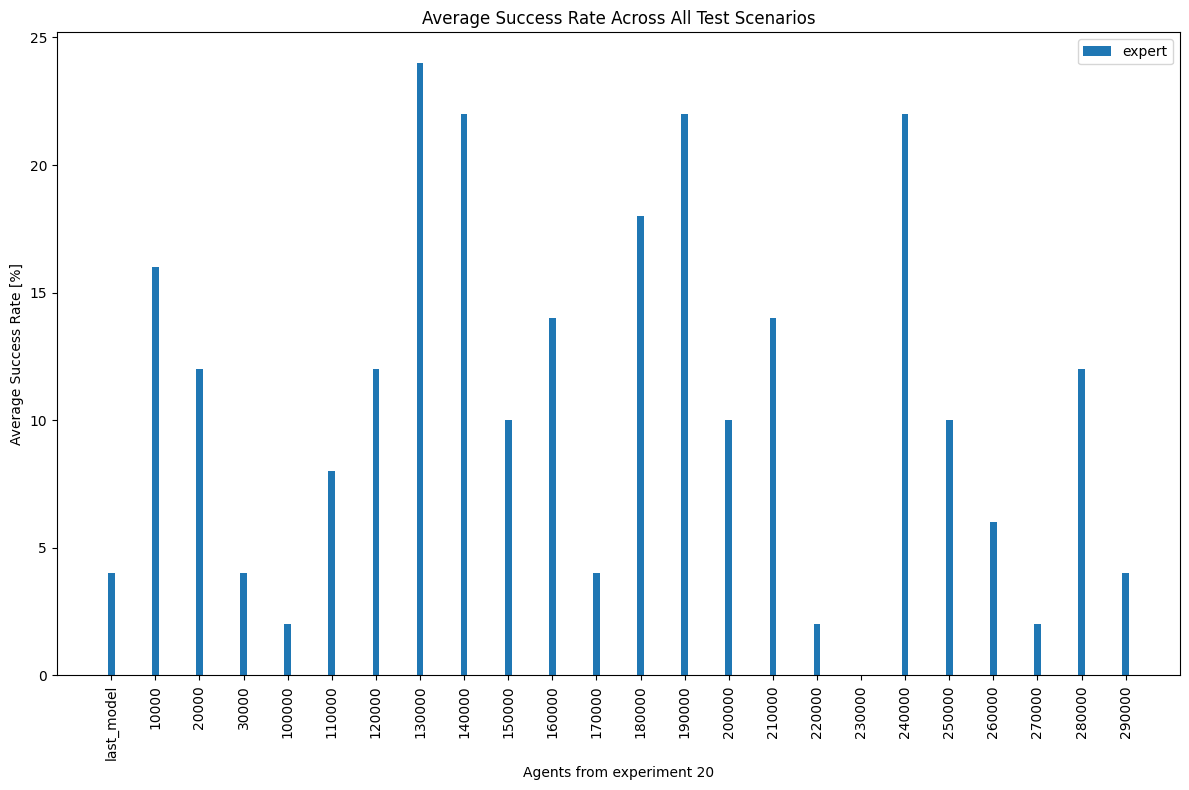

In [172]:
exp_id = 20
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

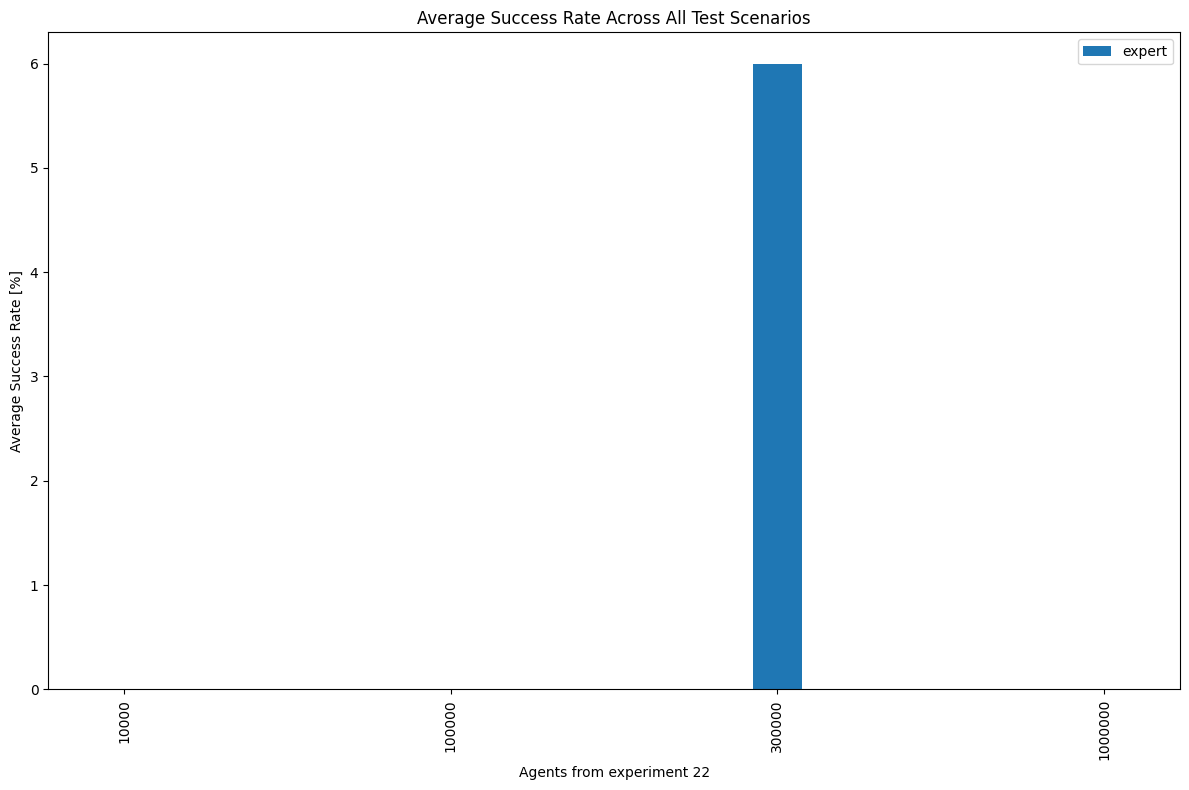

In [173]:
exp_id = 22
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

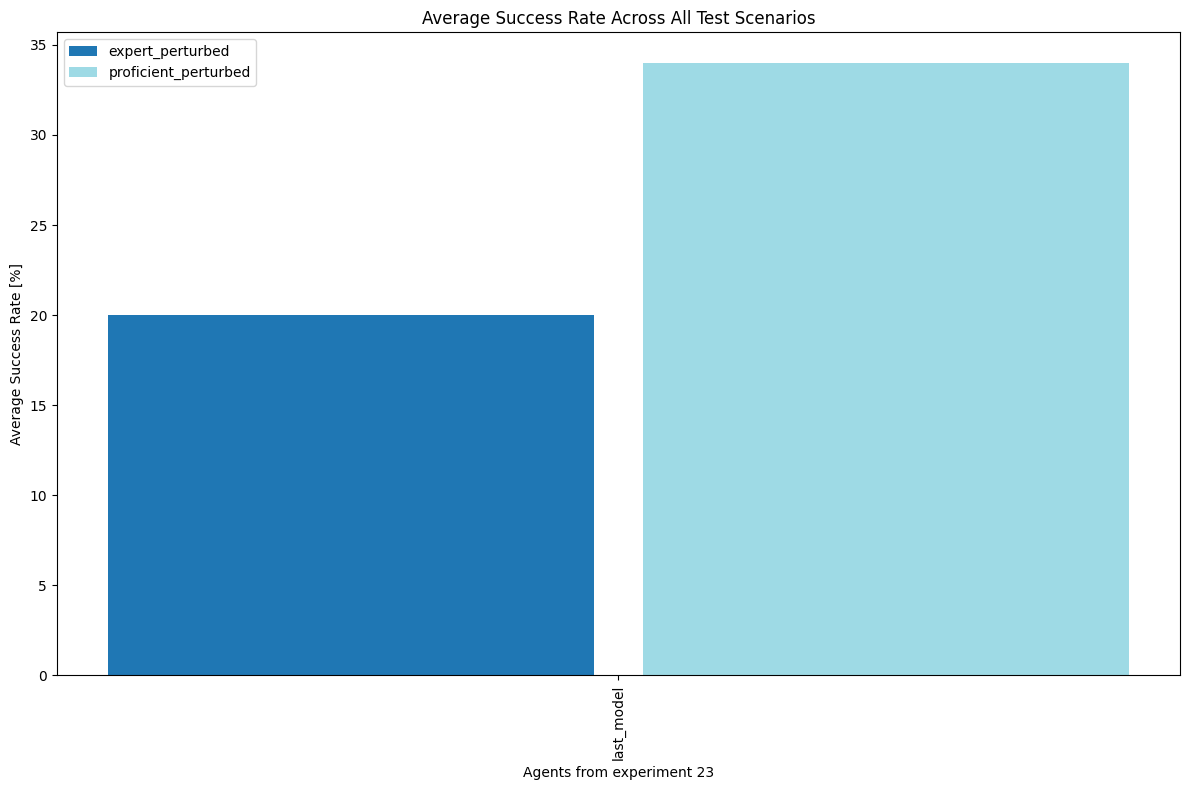

In [174]:
exp_id = 23
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

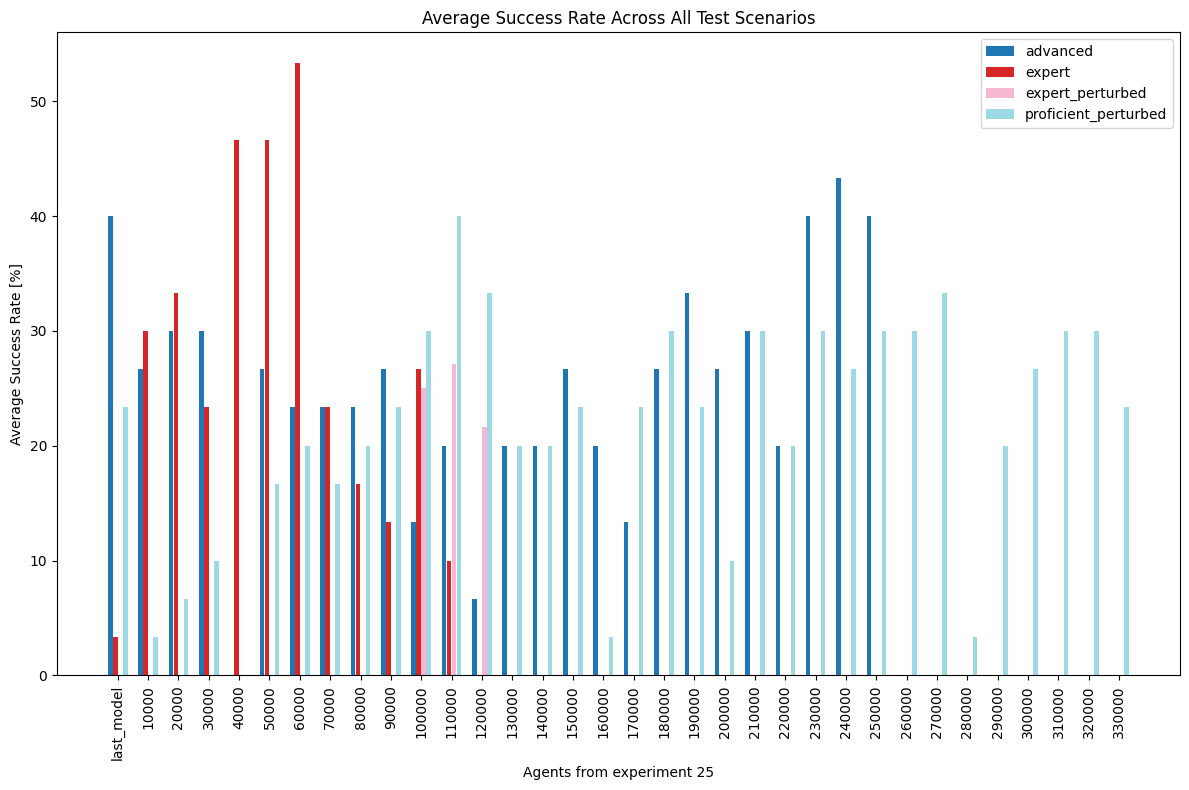

In [175]:
exp_id = 25
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

### New  Drone


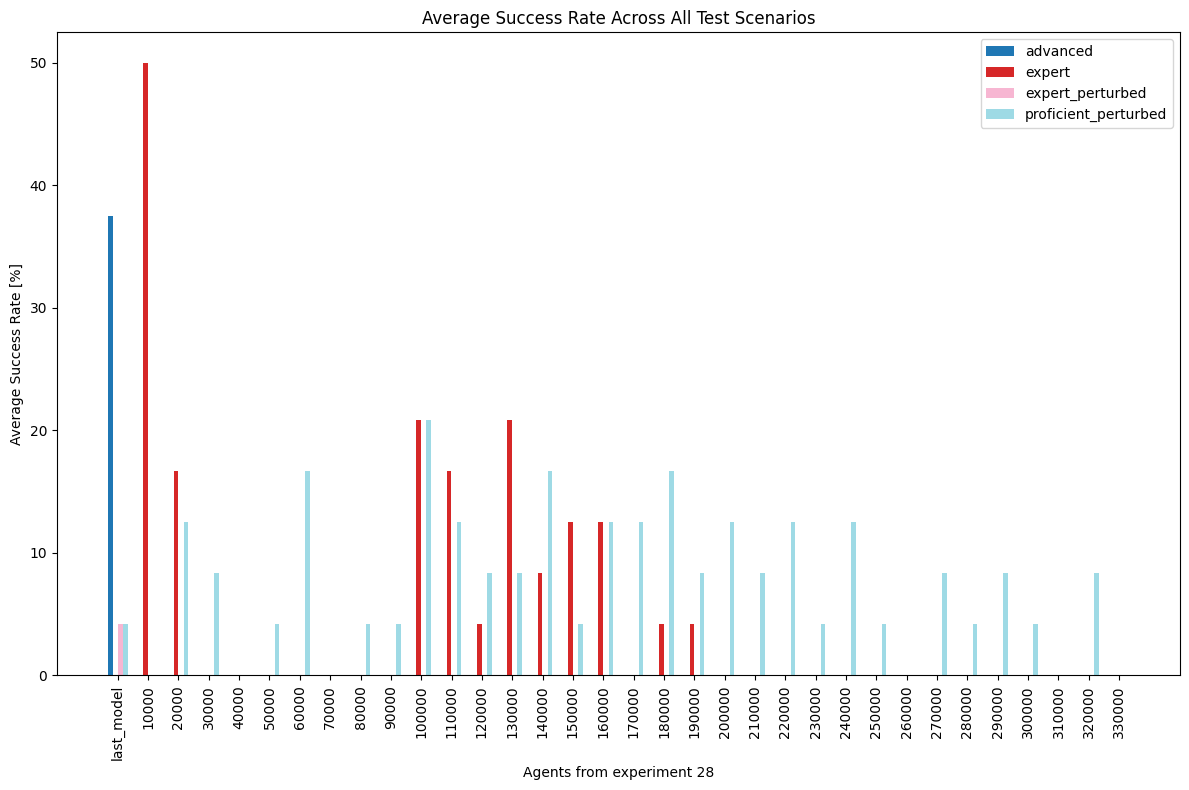

In [176]:
exp_id = 28
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

### Drone uncaged

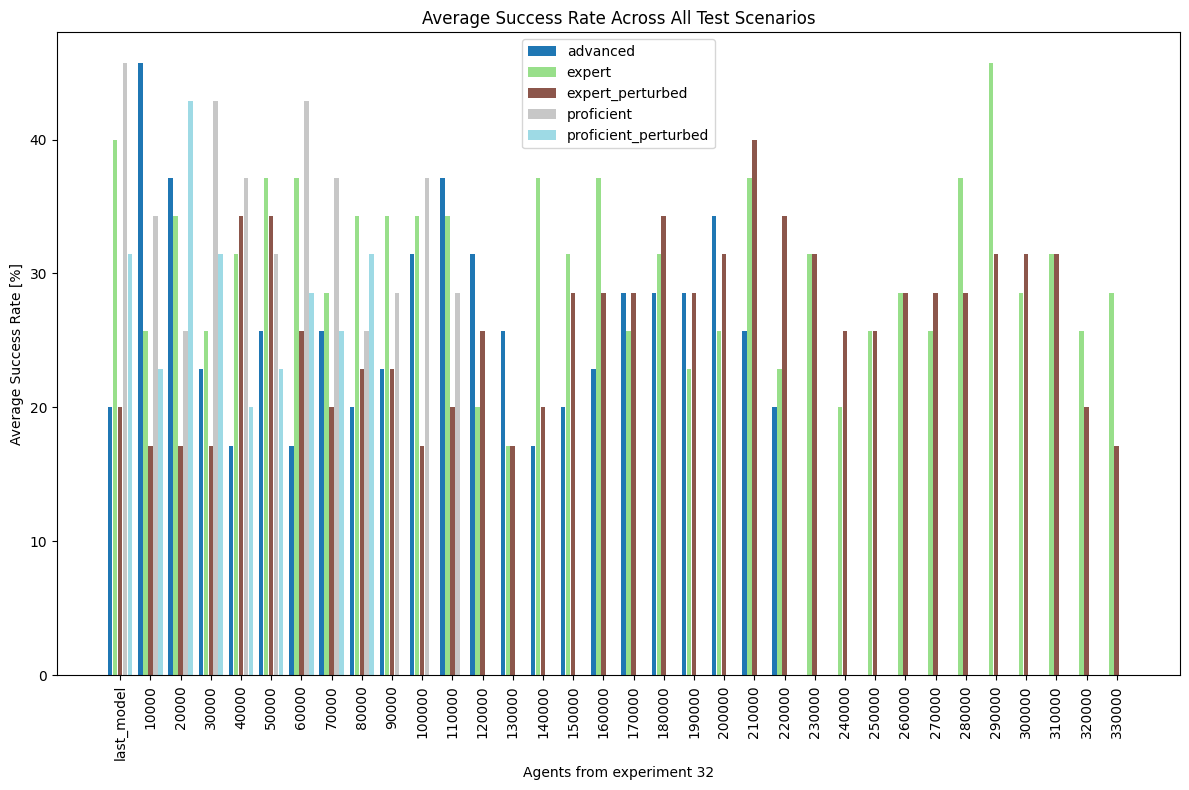

In [177]:
exp_id = 32
base_experiment_dir = f'log/LV_VAE_MESH-v0/Experiment {exp_id}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

## Narrowing down the best agents for THomas drone uncaged


In [178]:
exp_id = 32
expdir_string = f"Best_agents_Exp {exp_id}"

base_experiment_dir = f'log/LV_VAE_MESH-v0/{expdir_string}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'log/LV_VAE_MESH-v0/Best_agents_Exp 32'

# Checking how last proficient and advanced 10000 do when deterministic false


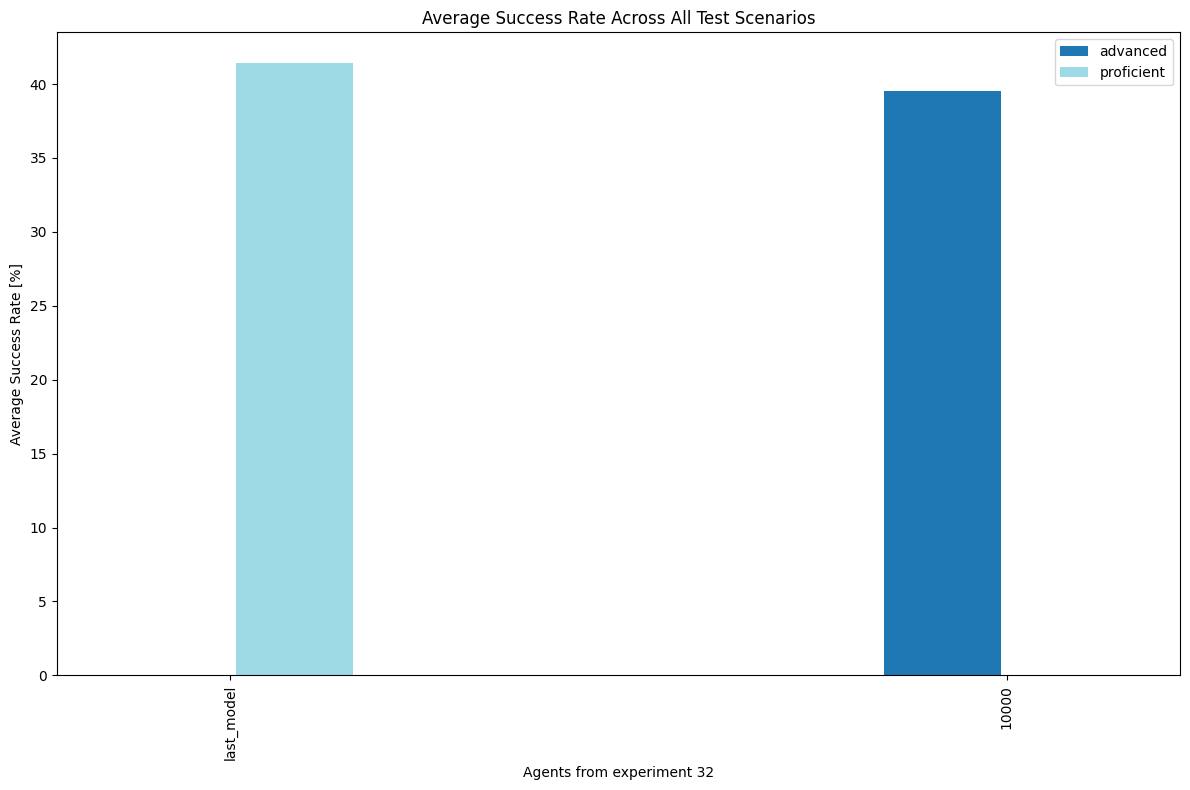

In [ ]:
exp_id = 32
expdir_string = f"Best {exp_id}"

base_experiment_dir = f'log/LV_VAE_MESH-v0/{expdir_string}'
metric_name = 'Success Rate' 

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

# The final actual resgen for baseline td uncaged

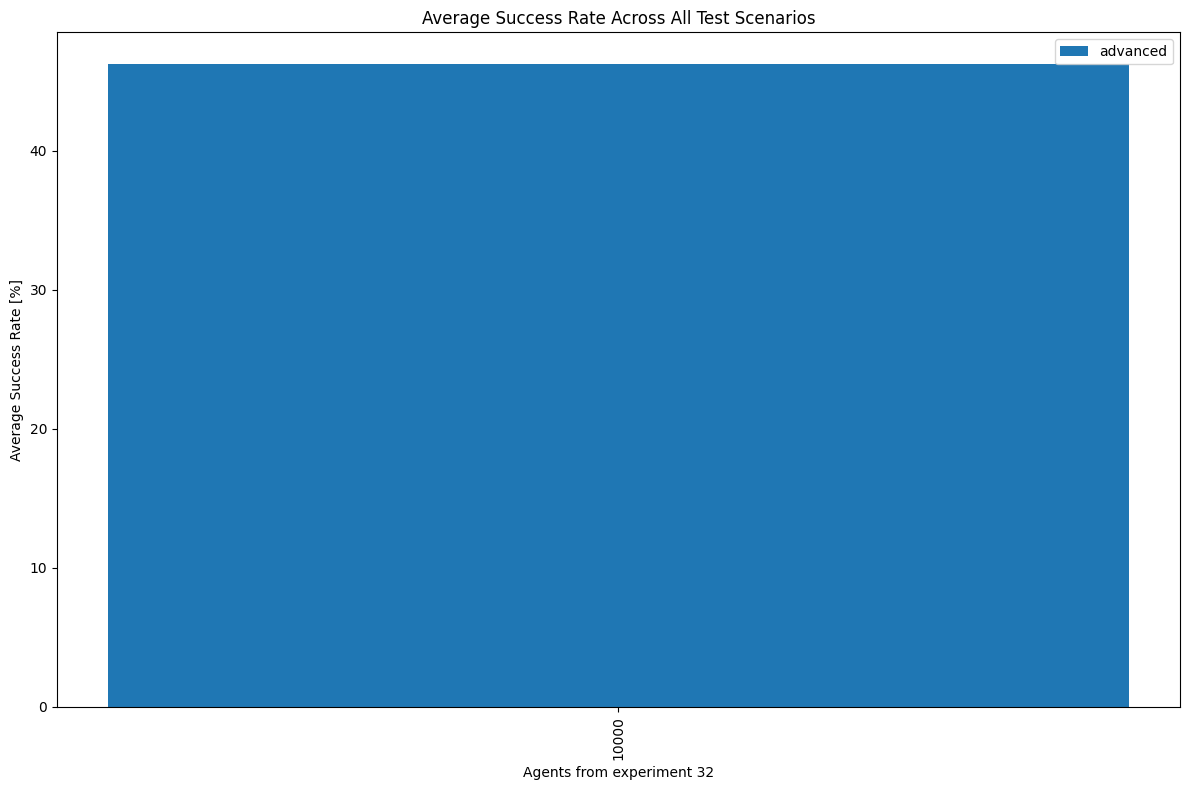

In [ ]:
exp_id = 32
expdir_string = f"Best_final_res_gen {exp_id}"

base_experiment_dir = f'log/LV_VAE_MESH-v0/{expdir_string}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

# Uncaged Thomas Drone ConvLocked config


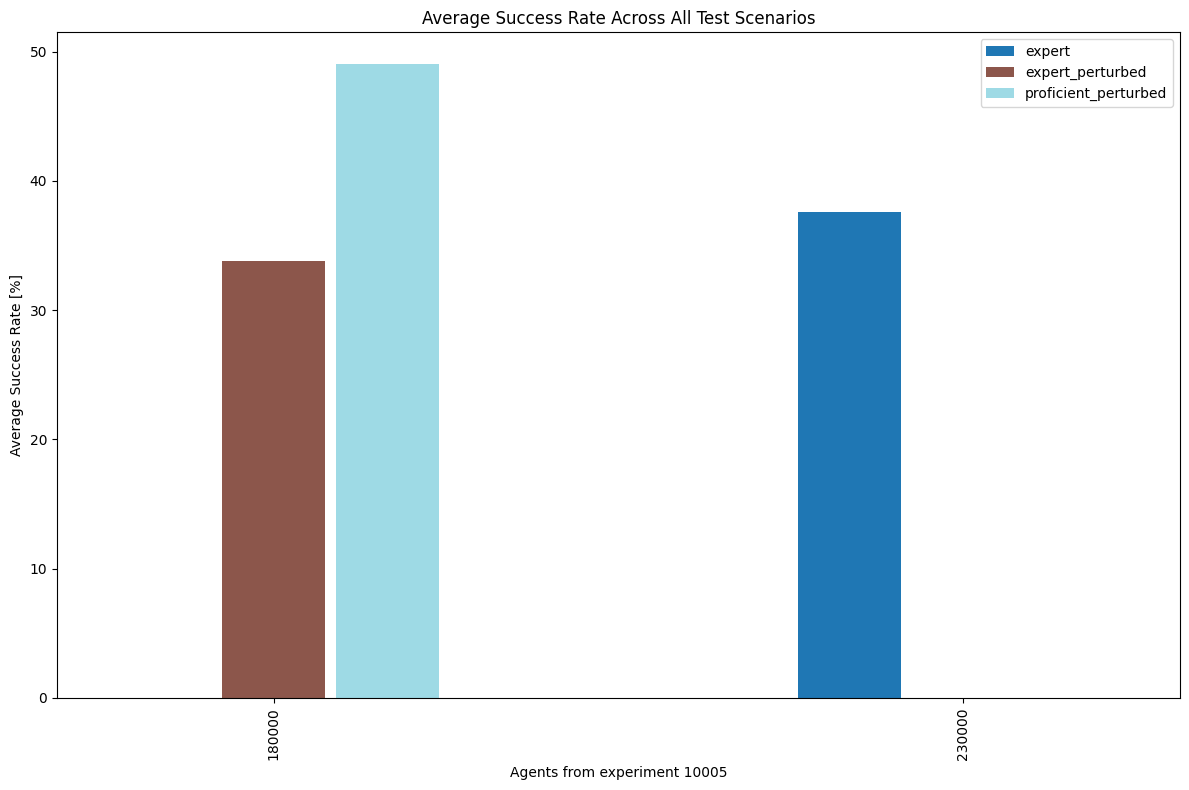

In [182]:
exp_id = 10005
expdir_string = f"A_Filter stage 2 exp {exp_id}"

base_experiment_dir = f'log/LV_VAE_MESH-v0/{expdir_string}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)

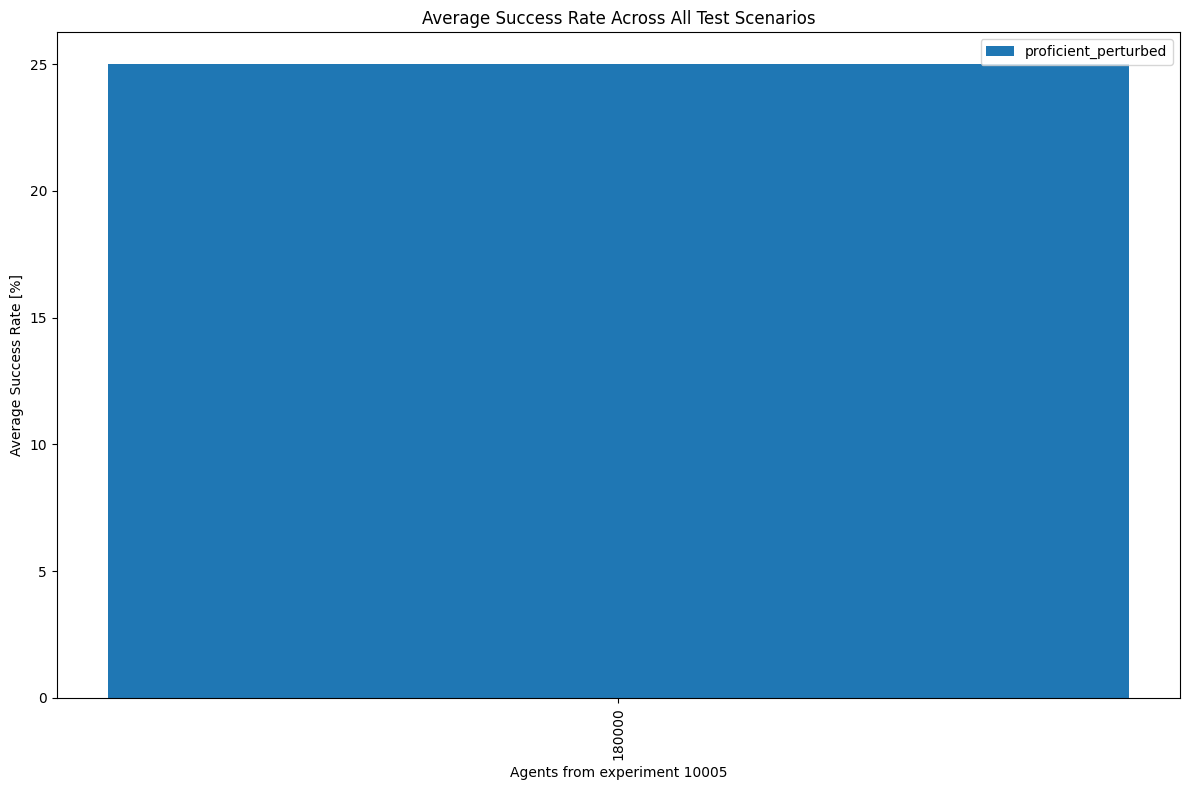

In [183]:
exp_id = 10005
expdir_string = f"Best_agent_res_gen_1 exp {exp_id}"

base_experiment_dir = f'log/LV_VAE_MESH-v0/{expdir_string}'
metric_name = 'Success Rate'  

results, scenarios = collect_all_results(base_experiment_dir, metric_name)
avg_results = calculate_average_metric(results)
visualize_combined_results(avg_results, scenarios, exp_id, metric_name)